# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt 
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

###F1_score

In [ ]:
df_a=pd.read_csv('5_a.csv') # impoting file
df_a = df_a.sort_values("proba",ascending = False) #sorting values by proba descending

df_a['y_cap'] = np.where(df_a['proba']< 0.5,0.0,1.0) #creating predicted y with threshold 0.5

TP = ((df_a["y"]==1)&(df_a['y_cap']==1)).sum() #True positive
TN = ((df_a["y"]==0)&(df_a['y_cap']==0)).sum() #True negative
FP = ((df_a["y"]==0)&(df_a['y_cap']==1)).sum() # False postive
FN = ((df_a["y"]==1)&(df_a['y_cap']==0)).sum() # False negative

pre = TP/(TP+FP) #precision
rec = TP/(TP + FN) # recall
F_1 = 2*(pre*rec)/(pre+rec) #F1 score 
print("F1 score =",F_1)

F1 score = 0.9950248756218906


###AUC_score

In [ ]:
thresh_a = np.unique(df_a['proba']) #list of threshold val from all unique porba values
tpr = np.empty(len(thresh_a)) #empty np array for true positive rate values
fpr = np.empty(len(thresh_a)) #empty np array for fale positive rate values 

In [ ]:

for idx,th in tqdm(enumerate(thresh_a)):# iterating over each threshold


    df_a['y_cap'] = np.where(df_a['proba']<th,0.0,1.0) # predicting Y_cap based on threshold

    TP = ((df_a["y"]==1)&(df_a['y_cap']==1)).sum() # true +ve
    TN = ((df_a["y"]==0)&(df_a['y_cap']==0)).sum() # true -ve
    FP = ((df_a["y"]==0)&(df_a['y_cap']==1)).sum() # fasle +ve
    FN = ((df_a["y"]==1)&(df_a['y_cap']==0)).sum() # fasle -ve
    
    tpr[idx] = TP/(FN+TP) #true +ve rate
    fpr[idx] = FP/(TN+FP) #fasle +ve rate




10100it [00:22, 446.08it/s]


In [ ]:
#soritng the values to avoid negative output from np.trapz
fpr.sort()
tpr.sort()

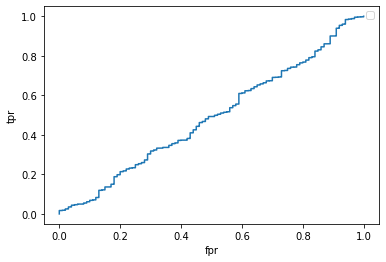

In [ ]:
# plotting tpr vs fpr
plt.plot(fpr,tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()
plt.show()

In [ ]:
print("AUC score is  = ",np.trapz(tpr,fpr))

AUC score is  =  0.48829900000000004




## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

###F1_score

In [ ]:
df_b=pd.read_csv('5_b.csv')
df_b = df_b.sort_values("proba",ascending = False) #sorting base on proba values

df_b['y_cap'] = np.where(df_b['proba']< 0.5,0.0,1.0) #predicting y_cap with 0.5 threshold

TP = ((df_b["y"]==1)&(df_b['y_cap']==1)).sum() # true +ve
TN = ((df_b["y"]==0)&(df_b['y_cap']==0)).sum() # true -ve
FP = ((df_b["y"]==0)&(df_b['y_cap']==1)).sum() # flase +ve
FN = ((df_b["y"]==1)&(df_b['y_cap']==0)).sum() # fasle -ve

pre = TP/(TP+FP) # pecision
rec = TP/(TP + FN) # recall
F_1 = 2*(pre*rec)/(pre+rec) # F1 score
print("F1 score =",F_1)

F1 score = 0.2791878172588833


###AUC_score

In [ ]:
thresh_b = np.unique(df_b['proba']) #np array of unique threshold values
tpr = np.empty(len(thresh_b)) # empty np array for true +ve rates
fpr = np.empty(len(thresh_b)) # empty np array for fasle +ve rates

In [ ]:
for idx,th in tqdm(enumerate(thresh_b)): # iterating over each threshold


    df_b['y_cap'] = np.where(df_b['proba']< th,0.0,1.0) # predicting y_cap based on threshold

    TP = ((df_b["y"]==1)&(df_b['y_cap']==1)).sum() # true +ve
    TN = ((df_b["y"]==0)&(df_b['y_cap']==0)).sum() # true -ve
    FP = ((df_b["y"]==0)&(df_b['y_cap']==1)).sum() # fasle +ve
    FN = ((df_b["y"]==1)&(df_b['y_cap']==0)).sum() # fasle -ve
    
    tpr[idx] = TP/(FN+TP) # true +ve rate
    fpr[idx] = FP/(TN+FP) # fasle +ve rate


10100it [00:27, 371.41it/s]


In [ ]:
# sorting both np arrays
fpr.sort()
tpr.sort()

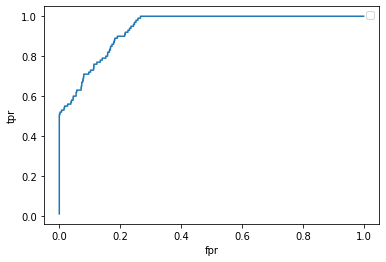

In [ ]:
#plotting tpr vs fpr
plt.plot(fpr,tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()
plt.show()

In [ ]:
print("AUC score =",np.trapz(tpr,fpr))

AUC score = 0.9377570000000001


## C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [ ]:
df_c=pd.read_csv('5_c.csv') 
thresh_c = np.unique(df_c['prob']) #np array of unique prob values
df_c = df_c.sort_values("prob",ascending=False) # sorting df_c by prob values
A = [] # empty list for score values

In [ ]:
for idx,th in enumerate(thresh_c): # iterating over each threshold

    df_c['y_cap'] = np.where(df_c['prob']< th,0.0,1.0) # predictig y_cap with threshold

    FP = ((df_c['y']== 0)&(df_c['y_cap']==1)).sum() #false +ve
    FN = ((df_c['y']== 1)&(df_c['y_cap']==0)).sum() #false -ve
    
    A.append( (500 * FN + 100 * FP)) # adding to the list
 
    

In [ ]:
print("Mininmum value of A is {0} and corresponding threshold value is {1}".format(np.amin(A),thresh_c[np.where(A == np.amin(A))]))

Mininmum value of A is 141000 and corresponding threshold value is [0.23003903]



## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [3]:
df_d=pd.read_csv('5_d.csv')
df_d['error']= df_d.pred - df_d.y # calculated error values for all calcalations

### Mean square error

In [4]:
err2sum = 0 #initial error square sum to be 0
for er in df_d.error: #iterating over errors
    err2sum += er**2 #adding square of errors 
MSE = err2sum/len(df_d) # Dviding sum by total number of values
print("Mean square error = ",MSE)

Mean square error =  177.16569974554707


###MAPE

In [5]:
er_sum = 0 # initial sum of abs errors to be 0
for er in df_d.error: # iterating over errors
    er_sum += abs(er) # adding to the sum
MAPE = er_sum/df_d['y'].sum() #dividing er_sum by sum of all y values
print("MAPE = ",MAPE)

MAPE =  0.1291202994009687


###R^2 error

In [6]:
#SSres is same as err2sum
SStot = 0 # initial SStot to be 0
y_mean = df_d['y'].mean() # mean of y values
for obs in df_d.y:
    SStot += (obs - y_mean)**2
R_sq = 1- (err2sum/SStot)

print('R squared error =',R_sq)

R squared error = 0.9563582786990964
